In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# Read CSV to Pandas DataFrame and display top 5 rows
df = pd.read_csv(r'C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Data\home-data-for-ml-course\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
# Split data into features and traget
features = df.drop(['Id', 'SalePrice'], axis=1).columns
target = ['SalePrice']

In [10]:
X = df[features]
y = df[target]

In [11]:
# Isolate numerical columns from other feature columns
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

# Remove 'MSSubClass' from numerical columns because it is actually categorical
numerical_cols.remove('MSSubClass')

# Number of numerical features
len(numerical_cols)

35

In [13]:
# Check if numerical columns have null values in them
X[numerical_cols].isna().sum()

LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [14]:
# Check if training target has null values
y.isnull().sum()

SalePrice    0
dtype: int64

In [15]:
categorical_cols = X.columns.drop(numerical_cols)
categorical_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [17]:
X_categorical = X[categorical_cols]

# Check for null values
X_categorical.isna().sum()

MSSubClass          0
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [18]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing of categorical data
one_hot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

categorical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', one_hot),
    # ('rename', DynamicColumnRenamer(categorical_cols))
])

# Full column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_cols),
        ('categorical', categorical_transformer, categorical_cols)
    ]
)

# Define a Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Full data pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

In [19]:
# Training the enhanced model
rf_pipeline.fit(X, y)

c:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  SimpleImputer(strategy='median'),
                                                  ['LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'Half...
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

In [22]:
test = pd.read_csv(r'C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Data\home-data-for-ml-course\test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [26]:
X_test = test.drop('Id', axis=1)

# Predict 'SalePrice' based on X_test
predictions = rf_pipeline.predict(X_test)

In [33]:
# File submission to Kaggle
import os

directory = r"C:\Users\jorda\Documents\studies\DScourse\KaggleSubmissions"
if not os.path.exists(directory):
    os.makedirs(directory)

number = input('Serial Number: ')

file_path = os.path.join(directory, f'submission_{number}_jordan.csv')

submission = pd.DataFrame({
    "Id": test["Id"],  # Replace with your test data ID column
    "SalePrice": predictions  # Your model's predictions
})

submission.to_csv(file_path, index=False)

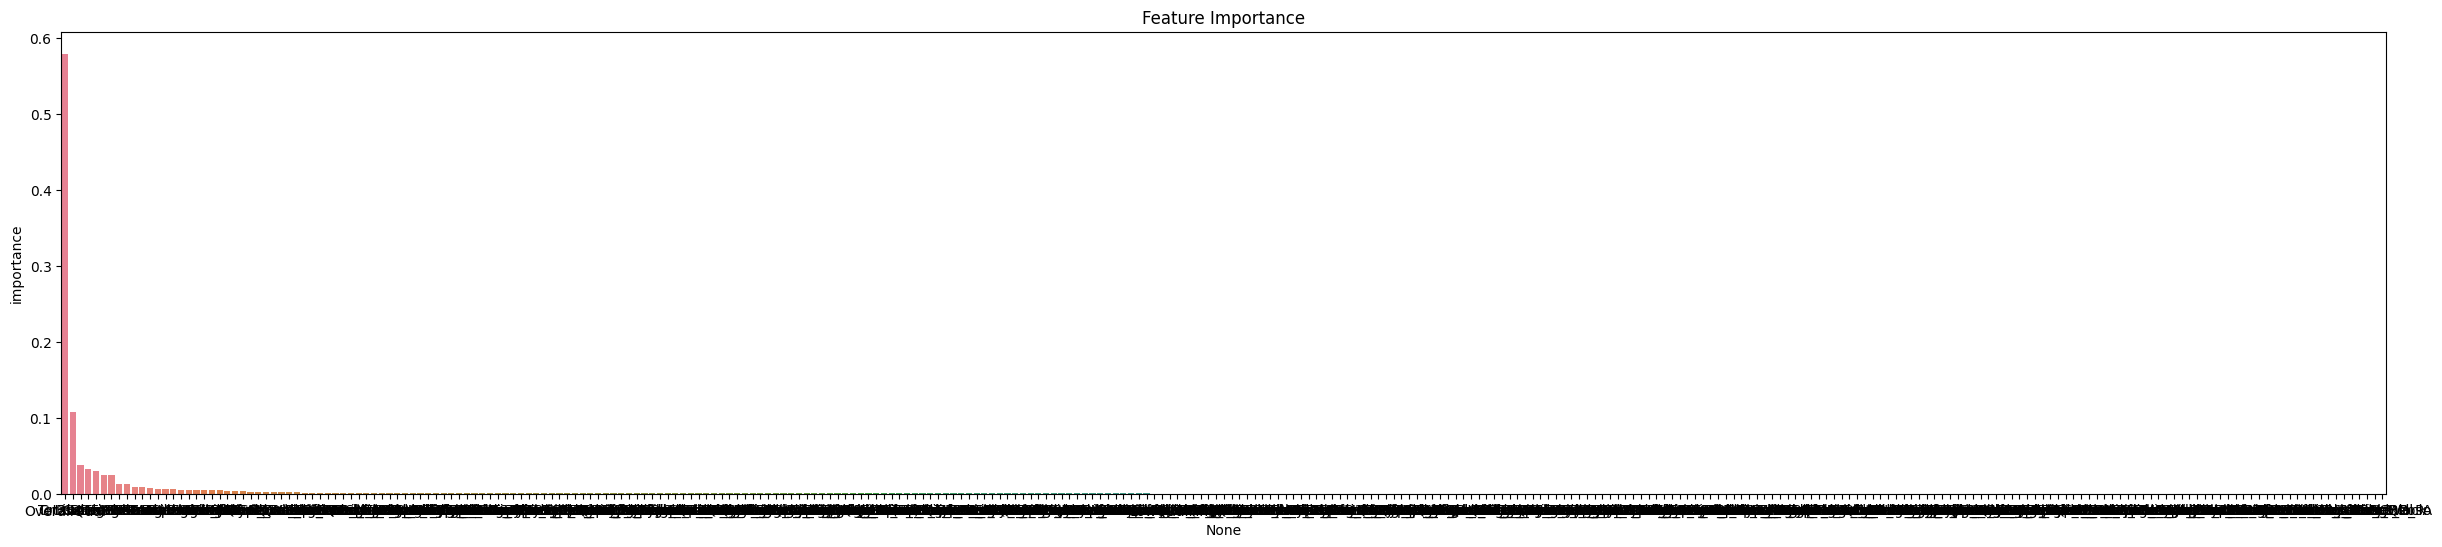

In [34]:
# Accessing 'Helpful_ml_functions' directory
%load_ext autoreload
from transformer_features import get_feature_names

# Get model object from pipeline
model = rf_pipeline.named_steps['model']

# Get feature_importances from model
importances = model.feature_importances_

# Get ColumnTransformer (preprocessor) from pipeline
rf_preprocessor = rf_pipeline.named_steps['preprocessor']

# Get feature names after preprocessing
feature_names = get_feature_names(rf_preprocessor)

# Create feature importance DataFrame
feature_importance = pd.DataFrame(data=importances, index=feature_names, columns=['importance'])

# Sort DataFrame by importance in descending order
feature_importance_sorted = feature_importance.sort_values(by='importance', ascending=False)

# Display full set of importances
plt.figure(figsize=(30, 6))
plt.title("Feature Importance")
sns.barplot(x=feature_importance_sorted.index, y=feature_importance_sorted['importance'], hue=feature_importance_sorted.index)
plt.show()

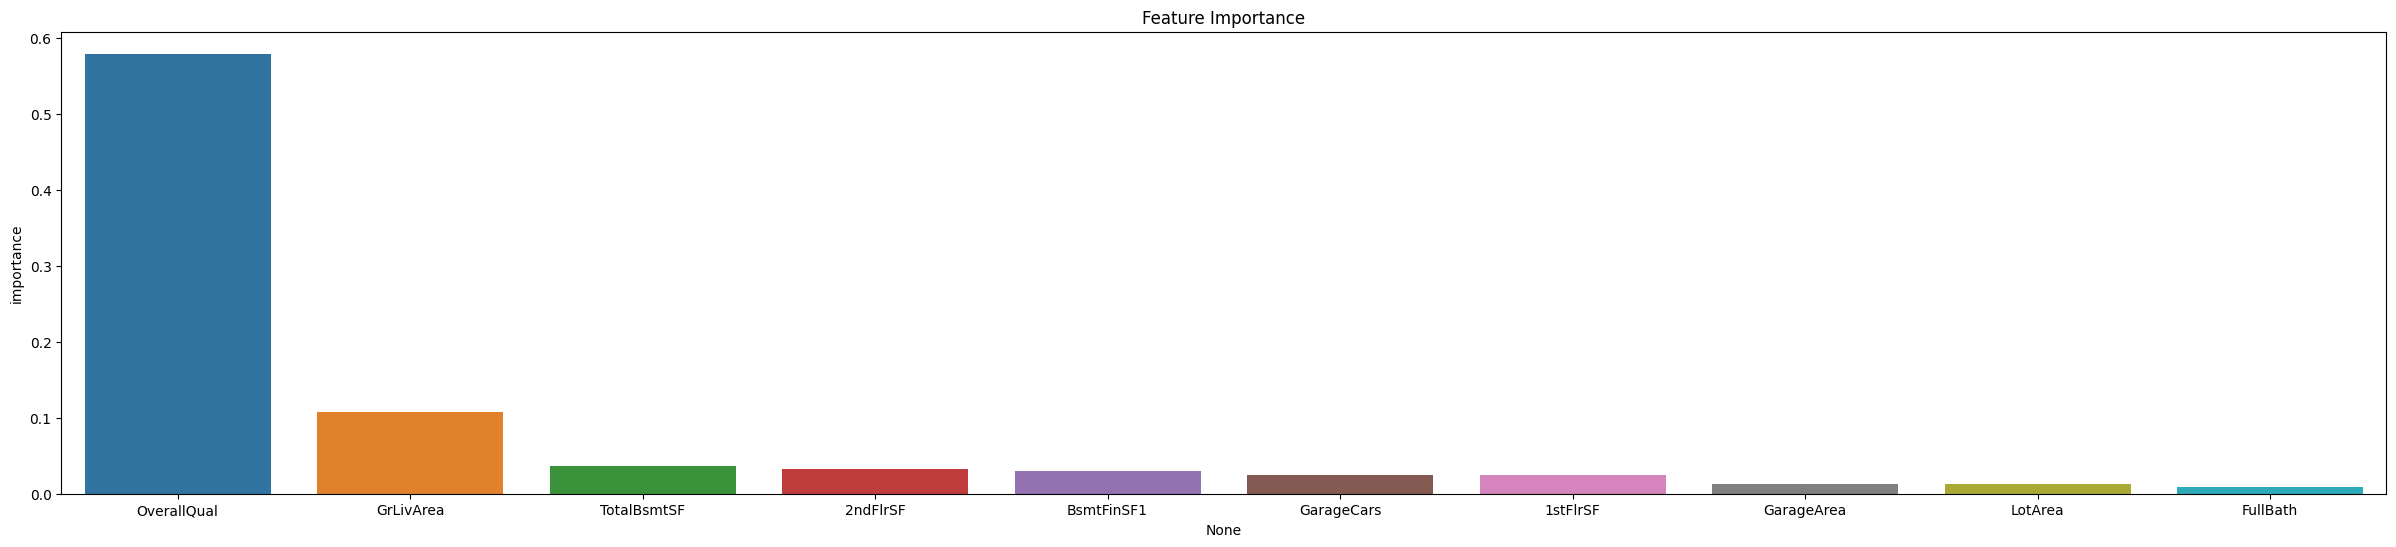

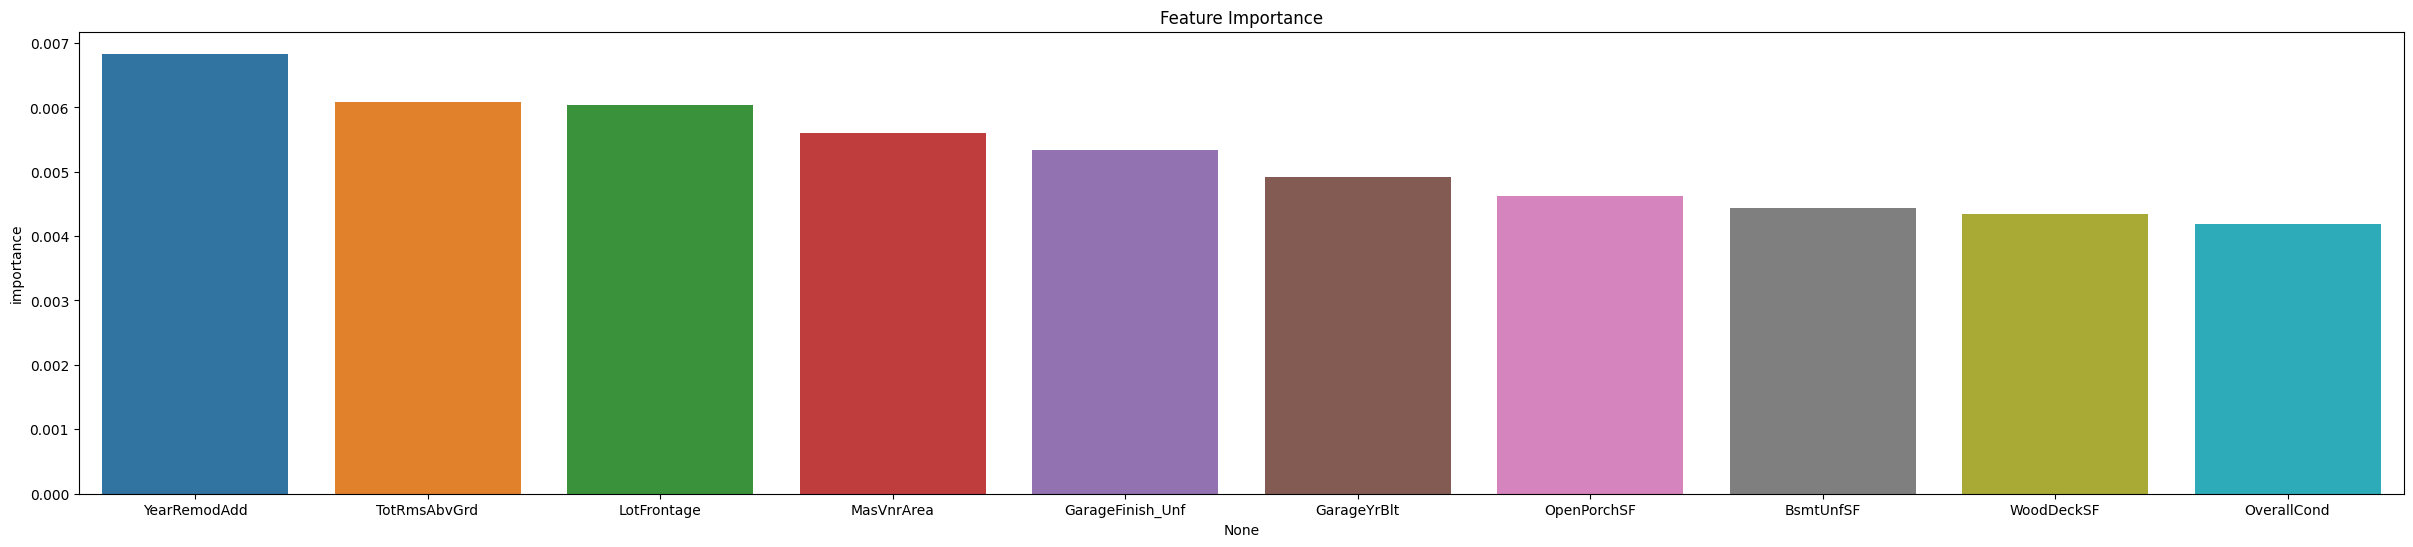

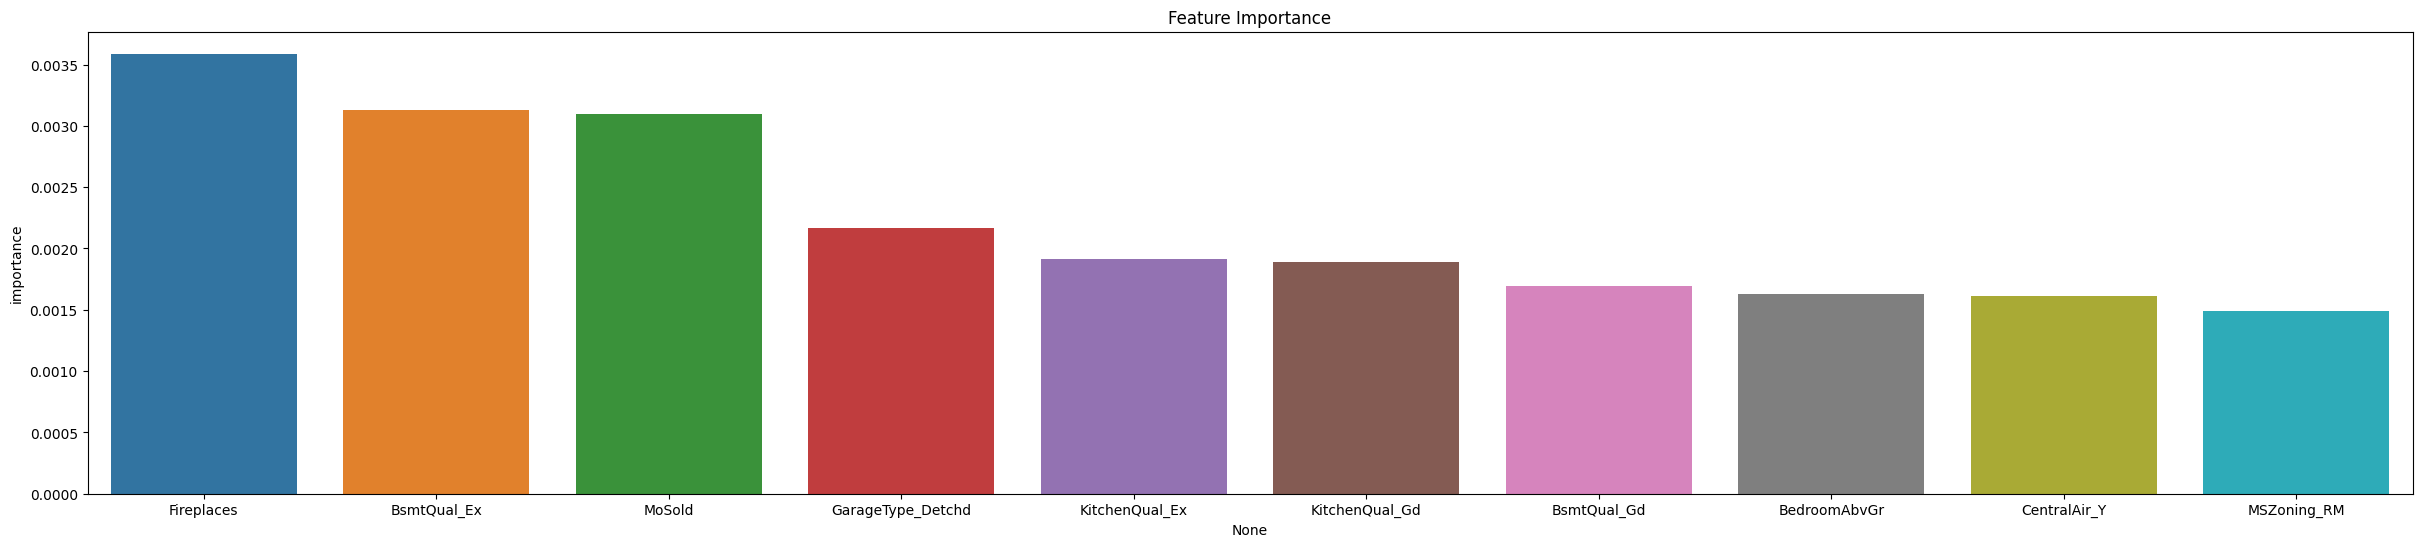

In [35]:
top_10_selected_cols = feature_importance_sorted.index[0:10]
top_10_cols_data = feature_importance_sorted['importance'][0:10]

# Display top 10 importances
plt.figure(figsize=(30, 6))
plt.title("Feature Importance")
sns.barplot(x=top_10_selected_cols, y=top_10_cols_data, hue=top_10_selected_cols)
plt.show()

# Display next 10 importances
plt.figure(figsize=(30, 6))
plt.title("Feature Importance")
sns.barplot(
    x=feature_importance_sorted.index[11:21], 
    y=feature_importance_sorted['importance'][11:21], 
    hue=feature_importance_sorted.index[11:21]
    )
plt.show()

# Display next 10 importances
plt.figure(figsize=(30, 6))
plt.title("Feature Importance")
sns.barplot(
    x=feature_importance_sorted.index[21:31], 
    y=feature_importance_sorted['importance'][21:31], 
    hue=feature_importance_sorted.index[21:31]
    )
plt.show()

In [37]:
base_feature_number = len(feature_importance_sorted.index)
base_feature_number

301

In [39]:
# Transform the training data
X_transformed = rf_pipeline.named_steps['preprocessor'].transform(X)

# Retrieve feature names for the numerical features
numerical_features = numerical_cols  # already defined in your code

# Retrieve feature names for the one-hot encoded categorical features
categorical_features = rf_pipeline.named_steps['preprocessor'].named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out(categorical_cols)

# Combine all feature names
all_features = numerical_features + categorical_features.tolist()

# Reconstruct the DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=all_features)

X_transformed_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
# Transform the testing data
X_test_transformed = rf_pipeline.named_steps['preprocessor'].transform(X_test)

# Reconstruct the DataFrame
test_transformed_df = pd.DataFrame(X_test_transformed, columns=all_features)

test_transformed_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,324.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,1017.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [93]:
selected_features = feature_importance_sorted.index[:225]
selected_features

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1',
       'GarageCars', '1stFlrSF', 'GarageArea', 'LotArea', 'FullBath',
       ...
       'LandSlope_Sev', 'Foundation_Wood', 'SaleType_Con',
       'Exterior1st_AsbShng', 'HouseStyle_2.5Fin', 'RoofMatl_WdShake',
       'Functional_Sev', 'Condition1_RRAn', 'GarageQual_Fa',
       'MasVnrType_BrkCmn'],
      dtype='object', length=227)

In [94]:
# Define a Random Forest model
enhanced_rf_model = RandomForestRegressor(random_state=42)

enhanced_rf_model.fit(X_transformed_df[selected_features], y)

c:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [95]:
enhanced_preds = enhanced_rf_model.predict(test_transformed_df[selected_features])

In [96]:
directory = r"C:\Users\jorda\Documents\studies\DScourse\KaggleSubmissions"
if not os.path.exists(directory):
    os.makedirs(directory)

number = input('Serial Number: ')

file_path = os.path.join(directory, f'submission_{number}_jordan.csv')

submission = pd.DataFrame({
    "Id": test["Id"],  # Replace with your test data ID column
    "SalePrice": enhanced_preds  # Your model's predictions
})

submission.to_csv(file_path, index=False)